In [63]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [64]:
df = pd.read_csv("../DATASETS/NL_better/NL_floats_temporal_7.csv",delimiter=";")
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df = df.drop(['Date'],axis=1)
df.head()


,Confirmed,Deaths,Recovered,start_date,NewCases,lockdown_severity,maximum_together,mentality_grade,government_performance,kindergarten_closed,...,UX,UXH,UN,UNH,EV24,Population,Children born,Deats total,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0,1000.0,7.0,8.0,0.0,...,99.0,1.0,96.0,15.0,1.0,1740853,14015,14120,22081,15743
2020-01-23,0.0,0.0,0.0,0.0,0.0,0,1000.0,7.0,8.0,0.0,...,99.0,2.0,80.0,13.0,3.0,1740853,14015,14120,22081,15743
2020-01-24,0.0,0.0,0.0,0.0,0.0,0,1000.0,7.0,8.0,0.0,...,98.0,2.0,87.0,12.0,2.0,1740853,14015,14120,22081,15743
2020-01-25,0.0,0.0,0.0,0.0,0.0,0,1000.0,7.0,8.0,0.0,...,98.0,24.0,86.0,12.0,1.0,1740853,14015,14120,22081,15743
2020-01-26,0.0,0.0,0.0,0.0,0.0,0,1000.0,7.0,8.0,0.0,...,99.0,1.0,80.0,13.0,6.0,1740853,14015,14120,22081,15743


# 1. Feature engineering

##### Add columns

## NaN handling

In [45]:
df.isna().any().any()

False

# 2. Feature selection

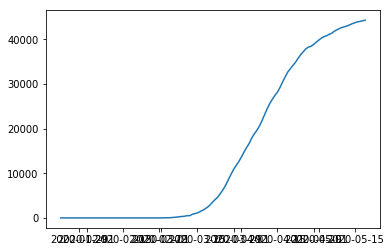

In [46]:
#Check if data is still sorted by date
plt.plot(df.Confirmed)

##### Auto encode columns with dtype object

In [48]:
# Show all dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2020-01-22 to 2020-05-19
Columns: 132 entries, Confirmed to Emmigration
dtypes: float64(124), int64(1), object(7)
memory usage: 123.6+ KB


##### Convert all dtypes to a float value

In [65]:
df = df.apply(pd.to_numeric)
df = df.astype(float)

##### Store DF

In [13]:
# df.to_csv("df_num.csv")

## FROM HERE

In [12]:
# df

In [28]:
# df = pd.read_csv('df_num.csv')
# df.Date = pd.to_datetime(df.Date)
# df = df.sort_values(by=['Date'])
# df = df.set_index(df.Date)
# df = df.drop(['Date'],axis=1)
# df.head()

In [130]:
# plt.figure(figsize=(59,59))
# sns.heatmap(df.corr());§

# Feature selection

##### Create heatmap for labels

In [303]:
dfx = df.iloc[:,5:]

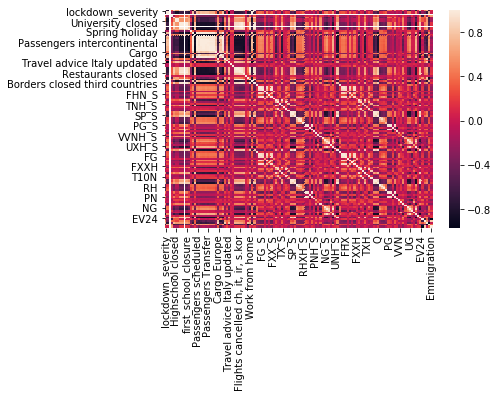

In [304]:
corr = dfx.corr()
sns.heatmap(corr)

##### Remove features with high correlation above 0.9

In [305]:
corr = dfx.corr()
a = len(dfx.columns)
# print("columns before removing: ",len(dfx.columns))
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = dfx.columns[columns]
newDFX = dfx[selected_columns]
b = len(newDFX.columns)
print("Columns removed: ",a-b)
# print("columns after removing: ",len(newDFX.columns))
# list(set(dfx.columns) - set(selected_columns))

Columns removed:  60


In [302]:
df.head()

,Confirmed,Deaths,Recovered,start_date,NewCases,lockdown_severity,maximum_together,mentality_grade,government_performance,kindergarten_closed,...,UX,UXH,UN,UNH,EV24,Population,Children born,Deats total,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,...,99.0,1.0,96.0,15.0,1.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,...,99.0,2.0,80.0,13.0,3.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,...,98.0,2.0,87.0,12.0,2.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,...,98.0,24.0,86.0,12.0,1.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,...,99.0,1.0,80.0,13.0,6.0,1740853.0,14015.0,14120.0,22081.0,15743.0


In [307]:
dx = newDFX
dx['Confirmed'] = df['Confirmed']
dx['Recovered'] = df['Recovered']
dx['Deaths'] = df['Deaths']
dx['NewCases'] = df['NewCases']
cols = list(dx.columns)
cols = cols[-4:] + cols[:-2]
dx = dx[cols]

In [319]:
dx = dx.iloc[:,:-2]

In [320]:
dx.head()

,Confirmed,Recovered,Deaths,NewCases,lockdown_severity,maximum_together,mentality_grade,government_performance,kindergarten_closed,Highschool closed,...,VVNH,VVXH,UX,UXH,UNH,Population,Children born,Deats total,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,1.0,13.0,99.0,1.0,15.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,4.0,13.0,99.0,2.0,13.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,5.0,10.0,98.0,2.0,12.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,24.0,10.0,98.0,24.0,12.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,1.0,17.0,99.0,1.0,13.0,1740853.0,14015.0,14120.0,22081.0,15743.0


# Feature importance univariate

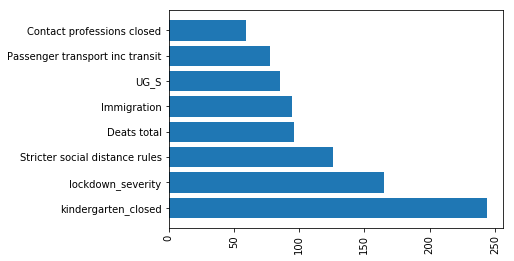

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<Figure size 432x288 with 0 Axes>

In [335]:
def plot_pearson(X,y,n,name):
    test = SelectKBest(score_func=f_regression, k=10) #Feature extraction
    fit = test.fit(X, y) 
    np.set_printoptions(precision=2) #Summarize score
    indices = np.argsort(fit.scores_)[::-1] #Get indices sorted by most important to least important
    features = [] #Get top n feature names
    
    for i in range(n): 
        features.append(X.columns[indices[i]])
    plt.figure()
    plt.barh(features, fit.scores_[indices[range(10)]], align='center')
    plt.xticks(rotation=90)
    plt.show()
    plt.savefig(name)
    return plt.figure
    
labels = dx.iloc[:,4:]
targetC = dx.iloc[:,0]
targetD = dx.iloc[:,2]
newcases = dx.iloc[:,3]

# plot_pearson(X=labels,y=targetC,n=10,name="Figures/P2_FS_confirmed.png")
# plot_pearson(X=labels,y=targetD,n=10,name="Figures/P2_FS_deaths.png")
plot_pearson(X=labels,y=newcases,n=10,name="Figures/P2_FS_newcases.png")


In [329]:
dx.head()

,Confirmed,Recovered,Deaths,NewCases,lockdown_severity,maximum_together,mentality_grade,government_performance,kindergarten_closed,Highschool closed,...,VVNH,VVXH,UX,UXH,UNH,Population,Children born,Deats total,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,1.0,13.0,99.0,1.0,15.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,4.0,13.0,99.0,2.0,13.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,5.0,10.0,98.0,2.0,12.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,24.0,10.0,98.0,24.0,12.0,1740853.0,14015.0,14120.0,22081.0,15743.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,...,1.0,17.0,99.0,1.0,13.0,1740853.0,14015.0,14120.0,22081.0,15743.0


In [332]:
dx.to_csv("nl_after_09.csv")

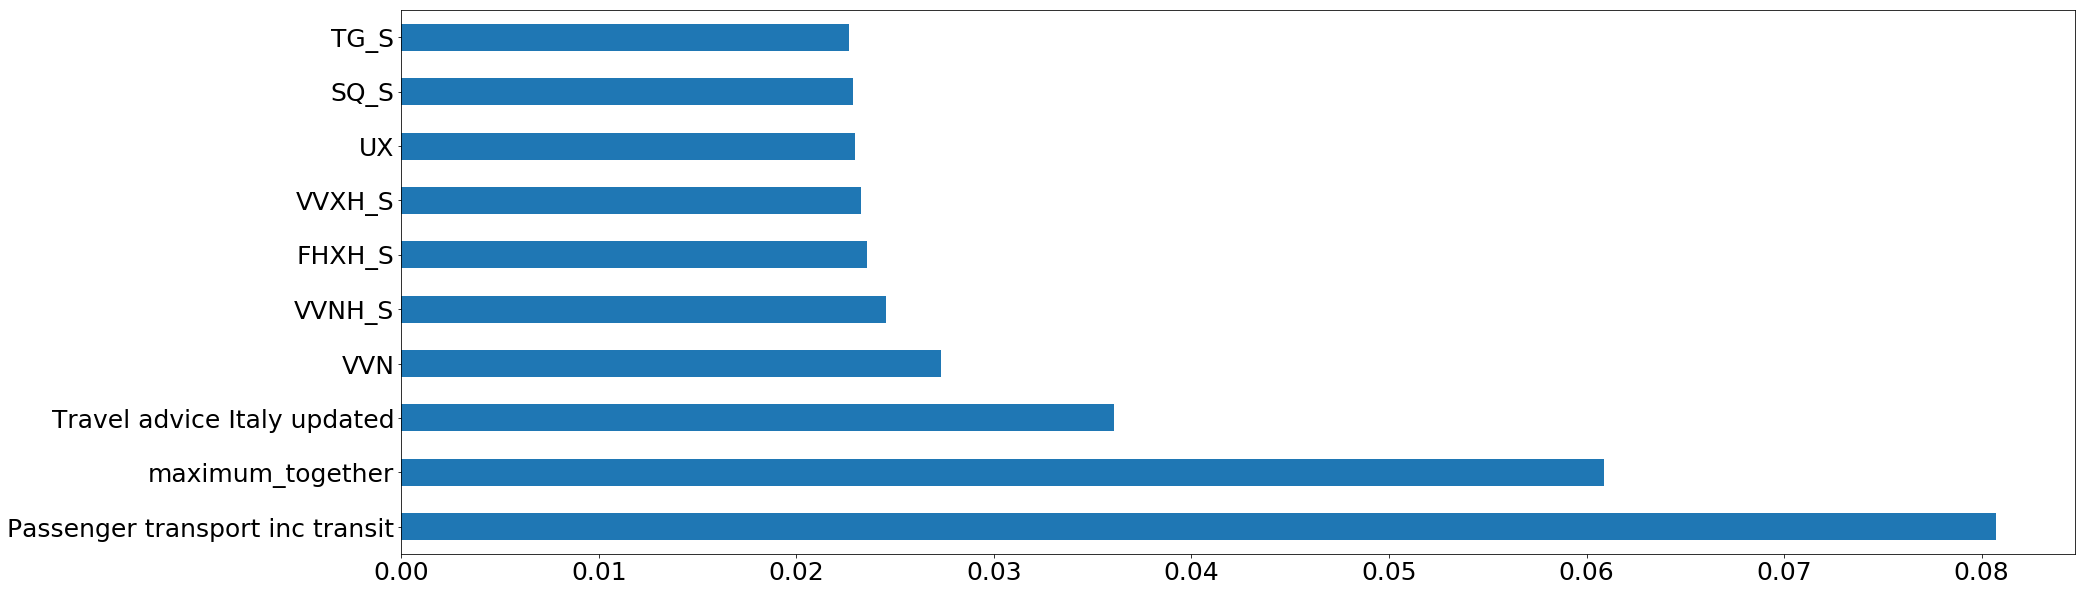

In [339]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib
matplotlib.use('TkAgg') 
import matplotlib.pyplot as plt

labels = dx.iloc[:,5:]
targetC = dx.iloc[:,0]
targetD = dx.iloc[:,2]
newcases = dx.iloc[:,3]

def plot_importance(X,y,filename,n=10):
    fig, ax = plt.subplots(figsize=(30, 10))

    X, y = labels,targetC

    model = ExtraTreesClassifier()
    model.fit(X,y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.tick_params(labelsize=25)
#     plt.show()
    plt.savefig(filename)
    
# plot_importance(X=labels,y=targetC,filename="Figures/P2_FI_confirmed_10.png")
# plot_importance(X=labels,y=targetD,filename="Figures/P2_FI_deaths_10.png")
plot_importance(X=labels,y=newCases,filename="Figures/P2_FI_newcases_10.png")

# After selecting

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

labels = newDFX.iloc[:,4:]
targetC = newDFX.iloc[:,0]
targetD = newDFX.iloc[:,1]
newCases = newDFX.iloc[:,3]

# apply SelectKBest class to extract top 10 best features
X, y = labels,targetD
DeathBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best features
DeathBest.append(featureScores.nlargest(15,'Score'))
top_death_feat = DeathBest[0].iloc[:,0]

X, y = labels,targetC
ConfirmedBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best features
ConfirmedBest.append(featureScores.nlargest(15,'Score'))
top_conf_feat = ConfirmedBest[0].iloc[:,0]

# apply SelectKBest class to extract top 10 best features
X, y = labels,newCases
newCasesBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(30,'Score'))  #print 10 best features
newCasesBest.append(featureScores.nlargest(15,'Score'))
top_new_cases = newCasesBest[0].iloc[:,0]

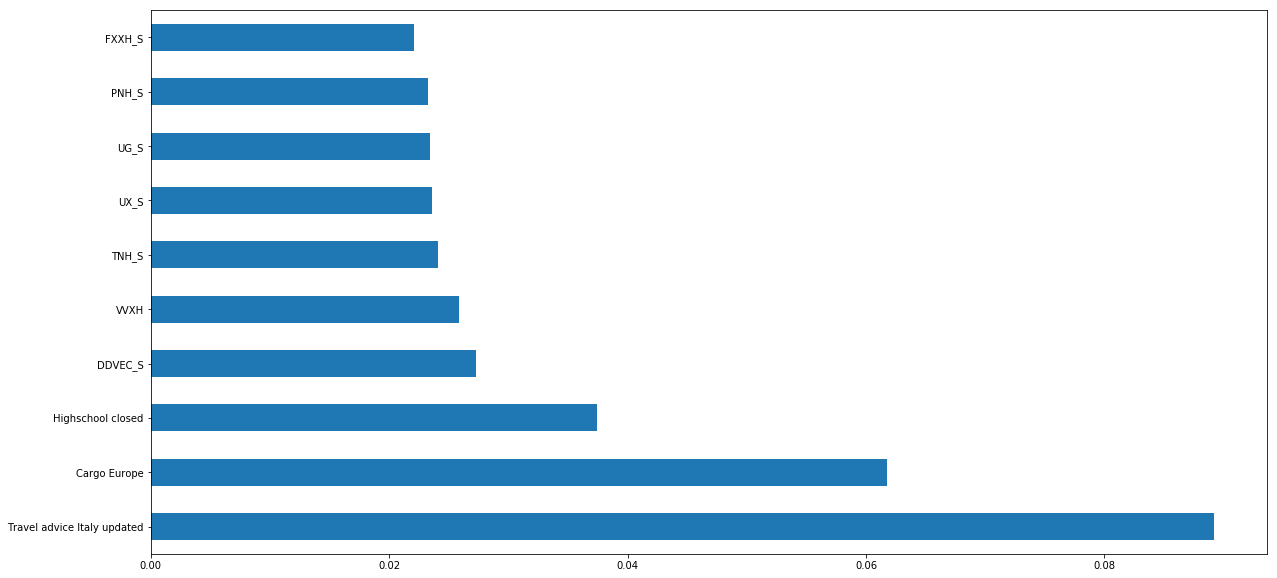

In [131]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

X, y = labels,targetD

model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Feature importance

In [123]:
a = df[top_death_feat].corr()

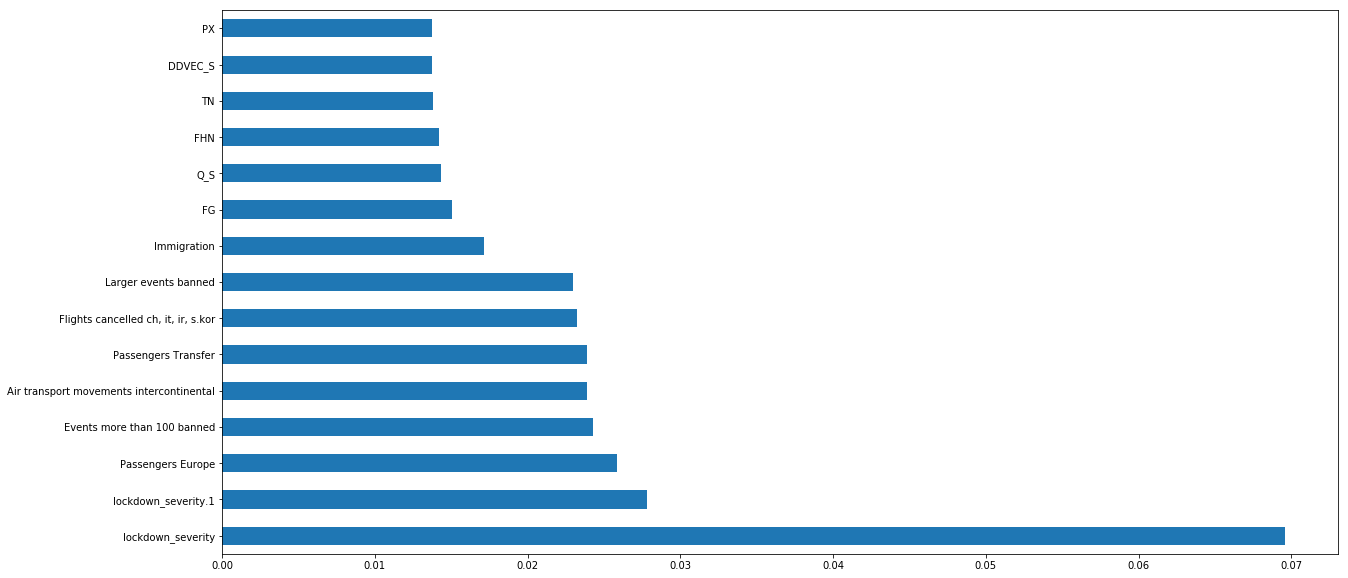

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

X, y = labels,targetD

model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [155]:
features

['mentality_grade',
 'restaurants_closed_to_everyone',
 'kindergarten_closed',
 'Stricter social distance rules',
 'Deats total',
 'Immigration',
 'UG_S',
 'Passenger transport inc transit',
 'Contact professions closed',
 'SQ_S']

In [187]:
X.columns[1]

'mentality_grade'

In [185]:
 np.argsort(fit.scores_)[::-1]

array([ 1,  5,  3, 16, 62, 63, 42,  8, 18, 30, 13,  0, 11, 41, 43,  9, 34,
       33,  6,  4, 10, 19, 37, 31, 39, 53, 32, 57, 54, 20, 52, 60, 61, 25,
       22,  7, 40, 29, 17, 27, 23,  2, 59, 12, 64, 35, 47, 51, 38, 15, 14,
       24, 44, 26, 49, 56, 36, 28, 58, 21, 55, 46, 50, 45, 48])

In [199]:
fit.scores_

array([4.80442775e+01,            nan, 2.57938792e+00, 2.44325772e+02,
       3.10530048e+01,            nan, 3.31608095e+01, 7.97781558e+00,
       7.73719639e+01, 3.97784213e+01, 2.77649248e+01, 4.10571832e+01,
       1.87935970e+00, 5.72618409e+01, 7.66094789e-01, 7.70294334e-01,
       1.26312432e+02, 4.11312843e+00, 5.93239769e+01, 2.74545475e+01,
       1.33795613e+01, 1.37404077e-01, 8.91866543e+00, 2.64680824e+00,
       5.51104413e-01, 1.02608751e+01, 3.35985780e-01, 3.18967946e+00,
       1.59508947e-01, 4.28918961e+00, 5.82042683e+01, 2.52766071e+01,
       1.83404609e+01, 3.60666077e+01, 3.69975768e+01, 1.83134310e+00,
       1.88159522e-01, 2.53700730e+01, 9.86883836e-01, 2.30212932e+01,
       4.62288907e+00, 4.06527983e+01, 8.52003247e+01, 4.04234792e+01,
       4.11067974e-01, 3.62703836e-02, 5.15190351e-02, 1.39452946e+00,
       7.10913319e-04, 2.82011046e-01, 4.01455596e-02, 1.28084157e+00,
       1.26406157e+01, 2.19940098e+01, 1.53433515e+01, 6.71260208e-02,
      

In [206]:
scores = fit.scores_[::-1]

In [215]:
indices = np.nan_to_num(indices,0)
indices

array([ 1,  5,  3, 16, 62, 63, 42,  8, 18, 30, 13,  0, 11, 41, 43,  9, 34,
       33,  6,  4, 10, 19, 37, 31, 39, 53, 32, 57, 54, 20, 52, 60, 61, 25,
       22,  7, 40, 29, 17, 27, 23,  2, 59, 12, 64, 35, 47, 51, 38, 15, 14,
       24, 44, 26, 49, 56, 36, 28, 58, 21, 55, 46, 50, 45, 48])

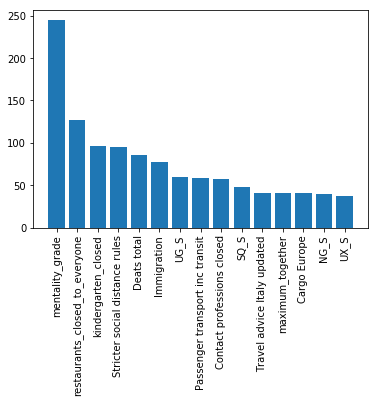

In [242]:
# apply SelectKBest class to extract top 10 best features
X, y = labels,targetD
# newCasesBest = []
# bestfeatures = SelectKBest(score_func=f_regression, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# # print(featureScores.nlargest(30,'Score'))  #print 10 best features
# newCasesBest.append(featureScores.nlargest(15,'Score'))
# top_new_cases = newCasesBest[0].iloc[:,0]

# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]
indices = indices[~np.isnan(indices)]
# To get your top 10 feature names
features = []
for i in range(15):
# for i in range(10):
    features.append(X.columns[indices[i]])

# scores = fit.scores_[indices[range(12)]]
scores = fit.scores_[indices[range(17)]]
scores = scores[~np.isnan(scores)]
# print(scores)
# Now plot
plt.figure()
plt.bar(np.arange(len(features)), scores, align='center')
plt.xticks(np.arange(len(features)), features, rotation=90)
plt.show()



In [193]:
features

['mentality_grade',
 'restaurants_closed_to_everyone',
 'kindergarten_closed',
 'Stricter social distance rules',
 'Deats total',
 'Immigration',
 'UG_S',
 'Passenger transport inc transit',
 'Contact professions closed',
 'SQ_S']

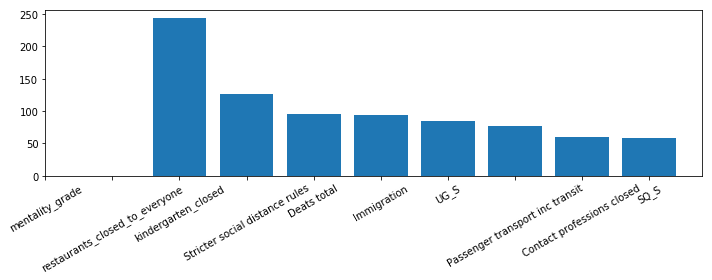

In [171]:
##the actual graph:
fig, ax = plt.subplots(figsize = (10,4))

idx = np.asarray([i for i in range(len(features))])

width = 0.2

ax.bar(idx,fit.scores_[indices[range(10)]])

ax.set_xticks(idx)
ax.set_xticklabels(features, rotation=30)
# ax.legend(['Diabete', 'Non-Diabete'])
# ax.set_xlabel('years')
# ax.set_ylabel('# of patients')

fig.tight_layout()

plt.show()


# Feature importance 2

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import eli5
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(labels, targetC, random_state=0)

from eli5.sklearn import PermutationImportance

my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0 ± 0.0000,restaurants_closed_to_everyone
0 ± 0.0000,T10NH_S
0 ± 0.0000,TXH_S
0 ± 0.0000,TNH_S
0 ± 0.0000,TN_S
0 ± 0.0000,TG_S
0 ± 0.0000,FXXH_S
0 ± 0.0000,FHNH_S
0 ± 0.0000,FHN_S
0 ± 0.0000,FHXH_S


In [269]:
def permutation_importances(rf, X_train, y_train, metric):
    """
    Return importances from pre-fit rf; metric is function
    that measures accuracy or R^2 or similar. This function
    works for regressors and classifiers.
    """
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

base_rf = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)
rf = clone(base_rf)
rf.fit(X_train, y_train)
oob = accuracy_score(rf, X_train, y_train)
print("oob accuracy",oob)

imp = permutation_importances(rf, X_train, y_train,
                              oob_classifier_accuracy)
imp

TypeError: Expected sequence or array-like, got estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [134]:
x = np.arange(len(features)) 

['mentality_grade',
 'restaurants_closed_to_everyone',
 'kindergarten_closed',
 'Stricter social distance rules',
 'Deats total',
 'Immigration',
 'UG_S',
 'Passenger transport inc transit',
 'Contact professions closed',
 'SQ_S']

In [150]:
# apply SelectKBest class to extract top 10 best features
# X, y = labels,targetD
# DeathBest = []
# bestfeatures = SelectKBest(score_func=f_regression, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(50,'Score'))  #print 10 best features
# # DeathBest.append(featureScores.nlargest(50,'Score'))
# # top_death_feat = DeathBest[0].iloc[:,0]

X, y = labels,targetC
ConfirmedBest = []
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features
# ConfirmedBest.append(featureScores.nlargest(30,'Score'))
# top_conf_feat = ConfirmedBest[0].iloc[:,0]

                                       Specs       Score
14                            Transit direct  530.572765
23  Air transport movements intercontinental  468.691970
21                   Air transport movements  461.519447
22            Air transport movements Europe  459.453512
24                                     Cargo  409.170566
16                  Passengers non scheduled  378.132954
42                       Universities closed  344.898938
18               Passengers intercontinental  324.063198
20                       Passengers Transfer  289.215464
38            Stricter social distance rules  283.525698
13           Passenger transport inc transit  280.101584
15                      Passengers scheduled  279.571250
19                            Passengers O&D  268.414262
27                       Cargo Latin America  263.505771
17                         Passengers Europe  260.446050
11                                     Month  260.054808
83                             

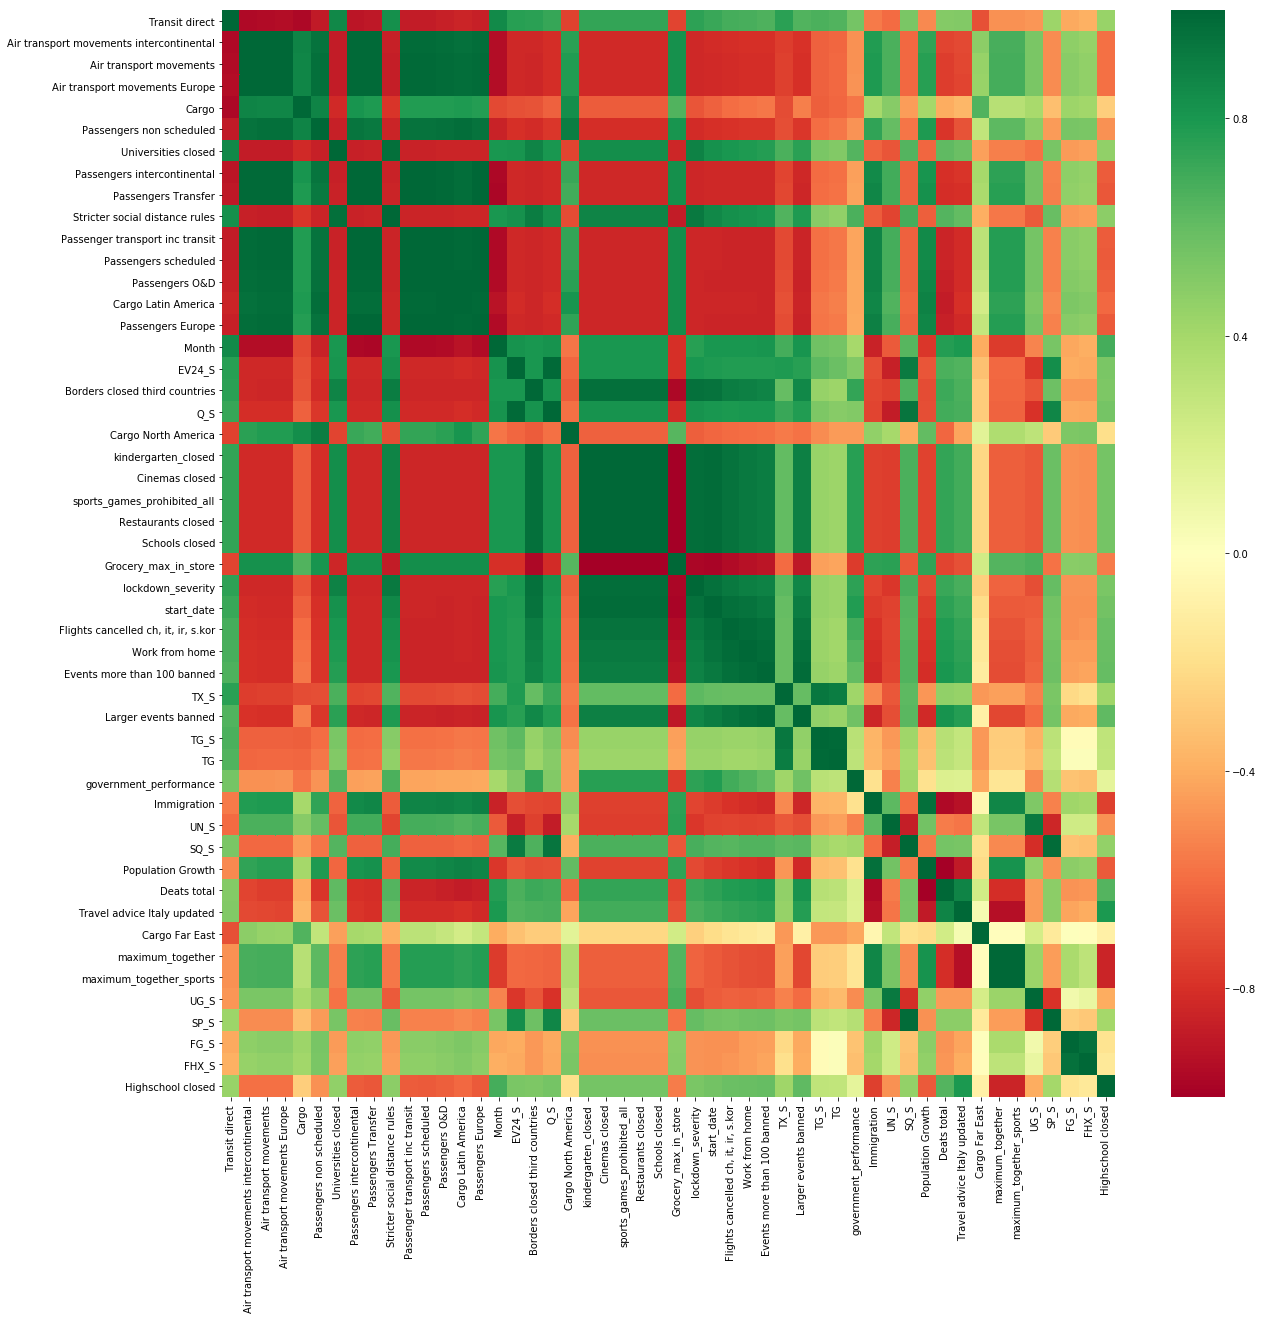

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
# X = data.iloc[:,0:20]  #independent columns
# y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index[:20]
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_conf_feat].corr(),annot=False,cmap="RdYlGn")

In [79]:
# corr = df.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [143]:
# sns.set(style="white")
# # Create a covariance matrix
# corr = df.corr()
# # Creating a mask the size of our covariance matrix
# mask = np.zeros_like(corr, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11,9))
# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220,10,as_cmap=True)
# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
#             linewidth=.5, cbar_kws={'shrink': .5})
# # ax.set_title('Multi-Collinearity of Features')
# # plt.savefig('correlation2.png')

In [118]:
labels = df.iloc[:,3]
targetC = df.iloc[:,0]
targetD = df.iloc[:,1]
targetR = df.iloc[:,2]

In [120]:
# # pearson's correlation feature selection for numeric input and numeric output
# from sklearn.datasets import make_regression
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# # generate dataset
# X,y = labels, targetC
# # define feature selection
# fs = SelectKBest(score_func=f_regression, k=10)
# # apply feature selection
# # X_selected = fs.fit_transform(X, y)
# # print(X_selected.shape)

In [94]:
# X_selected = fs.fit_transform(X, y)

In [31]:
corr = df.corr()
top_feat_conf = corr_matrix["Confirmed"].sort_values(ascending=False)[:20]
print(list(top_feat_conf.index))
# sns.heatmap(corr_matrix)

['Confirmed', 'Deaths', 'Transit direct', 'Month', 'Stricter social distance rules', 'EV24_S', 'EV24', 'Q_S', 'Borders closed third countries', 'Q', 'Grocery_max_in_store', 'Cinemas closed', 'first_school_closure', 'start_date', 'Restaurants closed', 'lockdown_severity', 'Flights cancelled ch, it, ir, s.kor', 'Work from home', 'Events more than 100 banned', 'TX_S']


##### Compare correlation between features

In [33]:
selected_columns

Index(['Confirmed', 'Recovered', 'start_date', 'maximum_together',
       'mentality_grade', 'government_performance', 'kindergarten_closed',
       'Highschool closed', 'restaurants_closed_to_everyone', 'Month',
       'Spring holiday', 'Passenger transport inc transit', 'Cargo',
       'Cargo Europe', 'Cargo Far East', 'Travel advice Italy updated',
       'Second confirmed case', 'Third Confirmed case', 'Decline in patients',
       'Contact professions closed', 'DDVEC_S', 'FHVEC_S', 'FHXH_S', 'FHN_S',
       'FHNH_S', 'FXXH_S', 'TG_S', 'TN_S', 'TNH_S', 'TXH_S', 'T10NH_S', 'SQ_S',
       'DR_S', 'RH_S', 'RHXH_S', 'PG_S', 'PXH_S', 'PNH_S', 'VVN_S', 'VVNH_S',
       'VVX_S', 'VVXH_S', 'NG_S', 'UG_S', 'UX_S', 'UXH_S', 'UNH_S', 'FHXH',
       'FHNH', 'FXXH', 'TNH', 'TXH', 'T10NH', 'RHX', 'RHXH', 'VVN', 'VVNH',
       'VVXH', 'UX', 'UXH', 'UNH'],
      dtype='object')

In [32]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
dfNew = df[selected_columns] 
dfNew

,Confirmed,Recovered,start_date,maximum_together,mentality_grade,government_performance,kindergarten_closed,Highschool closed,restaurants_closed_to_everyone,Month,...,TXH,T10NH,RHX,RHXH,VVN,VVNH,VVXH,UX,UXH,UNH
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,15.0,6.0,1.0,10.0,3.0,1.0,13.0,99.0,1.0,15.0
2020-01-23,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,13.0,24.0,2.0,2.0,1.0,4.0,13.0,99.0,2.0,13.0
2020-01-24,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,14.0,6.0,0.0,1.0,13.0,5.0,10.0,98.0,2.0,12.0
2020-01-25,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,13.0,24.0,0.0,1.0,3.0,24.0,10.0,98.0,24.0,12.0
2020-01-26,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,15.0,6.0,6.0,24.0,2.0,1.0,17.0,99.0,1.0,13.0
2020-01-27,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,13.0,24.0,23.0,22.0,41.0,3.0,10.0,95.0,3.0,15.0
2020-01-28,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,2.0,24.0,12.0,5.0,44.0,22.0,14.0,94.0,5.0,15.0
2020-01-29,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,15.0,6.0,3.0,9.0,62.0,8.0,4.0,86.0,22.0,15.0
2020-01-30,0.0,0.0,0.0,1000.0,7.0,8.0,0.0,0.0,1.0,100.0,...,24.0,6.0,2.0,18.0,20.0,19.0,11.0,96.0,18.0,11.0


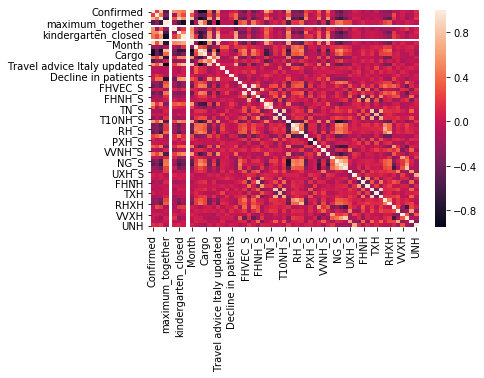

In [34]:
sns.heatmap(dfNew.corr())

In [48]:
corr_matrix = dfNew.corr()
corr_matrix["Confirmed"].sort_values(ascending=False)

Confirmed                          1.000000
Month                              0.844021
start_date                         0.755488
TG_S                               0.632556
government_performance             0.582504
SQ_S                               0.574600
Travel advice Italy updated        0.535405
Highschool closed                  0.424012
Contact professions closed         0.412646
VVX_S                              0.398049
mentality_grade                    0.382383
Recovered                          0.367878
Cargo Europe                       0.351919
Children born                      0.331880
VVN_S                              0.321153
TN_S                               0.310316
Population                         0.247025
PG_S                               0.185585
Decline in patients                0.058756
PNH_S                              0.054826
TXH_S                              0.046641
PXH_S                              0.042529
VVNH_S                          

In [49]:
dfNew['Deaths'] = df['Deaths']
cols = list(dfNew.columns)
cols = [cols[-1]] + cols[:-1]
dfNew = dfNew[cols]
dfNew.head()

,Deaths,Confirmed,Recovered,start_date,maximum_together,mentality_grade,government_performance,Highschool closed,Grocery_max_in_store,Month,...,UX_S,UXH_S,UNH_S,FHXH,FHNH,FXXH,Population,Children born,Immigration,Emmigration
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,5.0,2.0,1.0,22.0,3.0,1740853.0,14015.0,22081.0,15743.0
2020-01-23,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,1.0,19.0,6.0,1.0,6.0,1740853.0,14015.0,22081.0,15743.0
2020-01-24,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,96.0,21.0,13.0,11.0,1.0,14.0,1740853.0,14015.0,22081.0,15743.0
2020-01-25,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,24.0,12.0,2.0,6.0,2.0,1740853.0,14015.0,22081.0,15743.0
2020-01-26,0.0,0.0,0.0,0.0,1000.0,7.0,7.0,0.0,1000.0,100.0,...,98.0,1.0,18.0,24.0,2.0,23.0,1740853.0,14015.0,22081.0,15743.0


In [98]:
# df.head()
dfNew.to_csv("Corrected_df.csv")